In [11]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [78]:
kat3 = finesse.kat()
kat3.verbose=True
kat3.parse("""


l laser 1 0 nin                  
mod EOM 56.8M 0.001 1 pm nin n0 
maxtem 3                         
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4                        
m ITM 0.98997 0.01 0 n4 n5               
s scavity 3.3 n5 n6                   
m ETM 0.99996 0.00001 0 n6 n7                 

s s2 0.1 n3 n8                       
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump 
           

cav cavity ITM n5 ETM n6 
trace 2                  
attr ETM Rc 11.3         
attr ETM xbeta 0         
attr ITM xbeta 0         
pd1 PDrefl 56.8M 0 n8*   
pd1 PDtrans 56.8M 0 n7



s s20 0.1 n7 n80                       
bs bsQPD0 0.5 0.5 0 45 n80 n90 n100 dump 
s sQPD1 0.1 n9 n110                   
s sQPD2 0.1 n10 n120                  


attr sQPD1 g 40   
attr sQPD2 g 130 

pd1 QPDrefl1 56.8M 120 n110 
pdtype QPDrefl1 x-split   

pd1 QPDrefl2 56.8M 210 n120 
pdtype QPDrefl2 x-split   

set err PDrefl re    
lock z $err 3000 10n 
put ETM phi $z       
noplot z             
%xaxis ITM xbeta lin 0 0.8m 500 
xaxis ETM xbeta lin 0 0.8m 800  
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-27 04:23:28.250041


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 22.6 seconds

--- Output info ---

Run date and time: 2022-06-27 04:23:28.250040
Detectors used: PDrefl, PDtrans, QPDrefl1, QPDrefl2, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 800']
PDrefl   : min = -9.195031810822190e-09 max = 9.999790735364810e-09
PDtrans  : min = -1.431439556907340e-10 max = 8.675852670463830e-11
QPDrefl1 : min = -1.426701626888550e-05 max = 4.675074151154660e-08
QPDrefl2 : min = -7.269358780010929e-08 max = 1.070768860151340e-05
z        : min = 0.000000000000000e+00 max = 7.685674308484380e+01


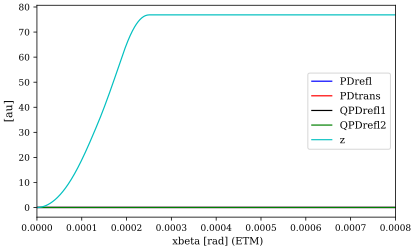

In [79]:
out2 = kat3.run()
out2.info()
out2.plot()

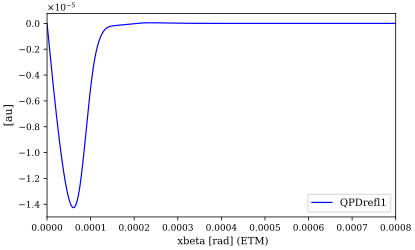

In [80]:
out2.plot(['QPDrefl1'])

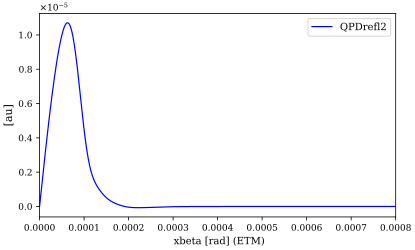

In [81]:
out2.plot(['QPDrefl2'])

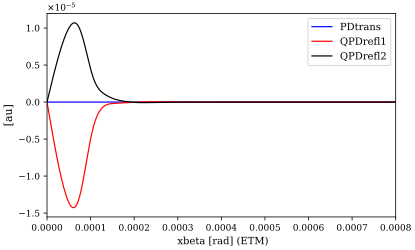

In [82]:
out2.plot(['QPDrefl1','QPDrefl2','PDtrans'])

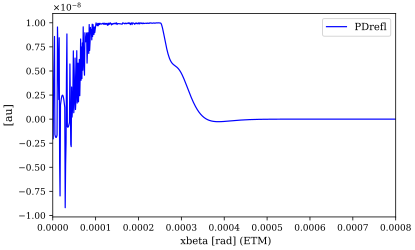

In [83]:
out2.plot(['PDrefl'])

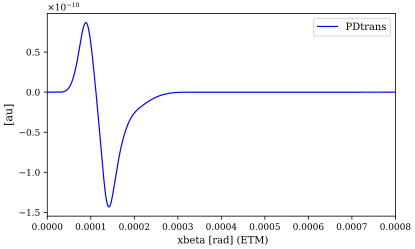

In [84]:
out2.plot(['PDtrans'])